# Lista de exercícios Data Science

lt é uma lista de tuplas "t", sendo que t[0] é o id e t[1] a número de horas do serviço utilizado pelo usuário. Transforme em um dicionário com chaves "id" e valor somatória de horas de uso. por exemplo, no dicionário, o id 1 terá valor 18 (2+9+7). Dica: percorra a lista (for t in ls:) e se t[0] estiver no dicionário faça isso, caso contrário, faça aquilo...


lt=[(1,2),(2,5),(1,9),(2,1),(3,2),(4,9),(1,7)]


In [1]:
lt = [(1,2),(2,5),(1,9),(2,1),(3,2),(4,9),(1,7)]
dictionary = {}

for i in range(len(lt)):
  if(lt[i][0] in dictionary):
    dictionary[lt[i][0]] += lt[i][1]
  else:
    dictionary[lt[i][0]] = lt[i][1]

dictionary


{1: 18, 2: 6, 3: 2, 4: 9}

Abra o dataframe dos carros e crie um novo campo 'potpeso' (produto da potência pelo peso. Depois, faça a standardização de potência,peso e potpeso (pots,pesos,potpesos).Mostre que as médias são zero e desvio padrão 1 após a standardização.Use dropna()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

model = pd.read_csv('https://raw.githubusercontent.com/douglasbarbosadelima/Data-Science/master/cars-uci-linked.csv')
model.describe()
model = model.dropna()
model = model.reset_index() # prevent non existent index into DataFrame

model['potpeso'] = model['horsepower'] * model['weight']

def standardization(product):
  mean = product.mean()
  std = product.std()
  product = (product - mean) / std
  return (product)

model['pots'] = standardization(model['horsepower'])
model['pesos'] = standardization(model['weight'])
model['potpesos'] = standardization(model['potpeso'])


print([(model['pots'].mean(), model['pots'].std()), (model['pesos'].mean(), model['pesos'].std())])
model.head()

[(-3.231542018105366e-16, 0.9999999999999972), (1.2815712210277636e-16, 1.0000000000000004)]


,index,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,potpeso,pots,pesos,potpesos
0,0,18.0,8,3070,130.0,3504,120,70,1,chevrolet chevelle malibu,455520.0,0.663285,0.619748,0.527908
1,1,15.0,8,3500,165.0,3693,115,70,1,buick skylark 320,609345.0,1.572585,0.842258,1.226388
2,2,18.0,8,3180,150.0,3436,110,70,1,plymouth satellite,515400.0,1.182885,0.539692,0.799808
3,3,16.0,8,3040,150.0,3433,120,70,1,amc rebel sst,514950.0,1.182885,0.536160,0.797764
4,4,17.0,8,3020,140.0,3449,105,70,1,ford torino,482860.0,0.923085,0.554997,0.652052


Quantas amostras de peso estão acima da média em 2* desvio padrão ? O que isso significa?

In [3]:
gtHorse = len([i for i in range(len(model)) if model['horsepower'][i] > model['horsepower'].std() * 2])
gtWeight = len([i for i in range(len(model)) if model['weight'][i] > model['weight'].std() * 2])

print('Horsepower Greather than Mean: ' + str(gtHorse), 'Horsepower Length: ' + str(len(model['horsepower'])))
print('Horsepower Greather than Mean: ' + str(gtWeight), 'Horsepower Length: ' + str(len(model['weight'])))

Horsepower Greather than Mean: 289 Horsepower Length: 392
Horsepower Greather than Mean: 390 Horsepower Length: 392


 Crie uma regressão linear (raiz, com gradiente descent, para calcular mpg) com peso, pot e peso x pot e verifique o erro médio quadrático final (200000 iterações, thetas iniciais 0.5 e learning rate 0.01). A função gradiente do EMQ já está fornecida.Faça o gráfico do EMQ ao longo das iterações

In [0]:
def grad(X,y,theta):
    return (1 / len(y)) * np.dot(X.T, np.dot(X, theta) - y)

In [5]:
#monte X e y

X = np.ones((len(model), 4)) # list of length equals 4, because of baias.
X[:, 1] = model['pots']
X[:, 2] = model['pesos']
X[:, 3] = model['pots'] * model['pesos']

y = model['mpg'].copy() # yEstimate

X, y

(array([[ 1.        ,  0.66328508,  0.61974833,  0.41106982],
        [ 1.        ,  1.57258478,  0.84225766,  1.32452158],
        [ 1.        ,  1.18288491,  0.53969206,  0.63839359],
        ...,
        [ 1.        , -0.53179452, -0.80360505,  0.42735276],
        [ 1.        , -0.66169447, -0.41509668,  0.27466718],
        [ 1.        , -0.5837545 , -0.30325336,  0.17702552]]), 0      18.0
 1      15.0
 2      18.0
 3      16.0
 4      17.0
        ... 
 387    27.0
 388    44.0
 389    32.0
 390    28.0
 391    31.0
 Name: mpg, Length: 392, dtype: float64)

In [6]:
#Gradient descent

arr_regression = []
theta = [0.5, 0.5, 0.5, 0.5]
learning_rate = 0.01
interactions = 50000

arr_regression.append(mean_squared_error(y, np.dot(X, theta)))
for i in range(interactions):
  grad_calc = grad(X, y, theta)
  theta = theta - (learning_rate * grad_calc)
  arr_regression.append(mean_squared_error(y, np.dot(X, theta)))

print(theta)

[21.93604919 -3.51721788 -4.39793539  1.75091343]


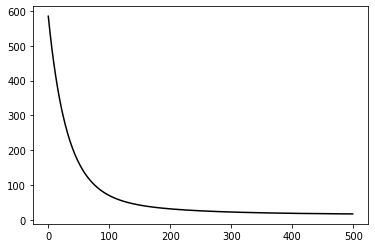

In [7]:
#faça o gráfico do erro nas iterações
plt.plot(arr_regression[:500], color='black')
plt.show()

Calcule, com base no modelo, o consumo (mpg) para um carro de 150HP e 2000kg

In [21]:
med = model['horsepower'].mean()
mew = model['weight'].mean()

dp = model['horsepower'].std()
dpw = model['weight'].std()

def predict(pot, peso):
  pots = (pot - med) / dp
  pesos = (peso - mew) / dpw
  return theta[0] + theta[1] * pots + theta[2] * pesos

print(predict(200, 2000)) # Here we predict of a car with 150 horserpower and 2000kg will spend 22.83l of gasoline.
model[model['weight'] == 2000] # filter inside model the data's weight equals 2000 to metrify the assert of Neural Network.

18.26833967288956


,index,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,potpeso,pots,pesos,potpesos
149,158,31.0,4,7900,67.0,2000,160,74,2,fiat x1.9,134000.0,-0.973454,-1.150908,-0.932033


Refaça o exemplo com sklearn, primeiro para obter emq

In [0]:
from sklearn.linear_model import LinearRegression
sk_linear = LinearRegression()
sk_linear.fit(X, y)
y_estimate = sk_linear.predict(X)

Agora, refaça a predição

In [26]:
mean_squared_error(y_estimate, y)

15.285769484105506

Faça, com sklearn split train test 70-30 (random_state=42) e apresente os erros no dataset de treino e de teste. Comente-os.

In [0]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
linear_split = sk_linear.fit(X_train, y_train)
y_estimate = sk_linear.predict(X_train)
error_train = mean_squared_error(y_estimate, y_train)

print('Train Error: ' + str(error_train))

yet = sk_linear.predict(X_test)
e_test = mean_squared_error(yet, y_test)
print('Test Error : ' +  str(e_test))

Train Error: 15.60149755399519
Test Error : 14.71391756814036


Resposta: